# Changing Patterns of Flooding in Miami: 30 Years of Trends Across Flood Types

## Summary:
We explore how sea level rise, high tide flooding, precipitation, and hurricanes have changed in Miami over the past 30 years. We will analyze the patterns of sea level rise, as well as the frequency of each flood type, to understand if flood risks are shifting.

Our hypothesis is as follows:
- Sea level in the Miami area has risen in the last 30 years
- The severity of high tide flooding, precipitation, and hurricanes has increased
- The frequency of hurricanes has increased

We will then superimpose our flood analysis with maps of Miami to understand risk by neighborhood.

## Sea Level Rise

To start our analysis, we look at sea level rise, as we assume that this is Miami's greatest "flooding" threat. We import Pandas, NumPy, and Matplotlib and pull in data from NOAA's Tides and Currents for the Virginia Key station (station 8723214) as this is the station closest to Miami.

Assumptions made:
- Sea level rise patterns for the Virginia Key station are also true for all of Miami due to proximity of the station to Miami.

Data notes/cleanup and visualization process:
- We changed column names to something legible for ease of use.
- We grouped the data, which was available by day, to year to observe larger patterns.
- We played around with chart types to see what would be best for us to use.

Additional comments added with hashtag (#) below.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("https://api.tidesandcurrents.noaa.gov/api/prod/datagetter?begin_date=19950601&end_date=20250629&station=8723214&product=monthly_mean&datum=STND&time_zone=lst&units=english&format=csv")

In [3]:
# with this step, we wanted to see what was in the dataset
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359 entries, 0 to 358
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        359 non-null    int64  
 1    Month      359 non-null    int64  
 2     Highest   357 non-null    float64
 3    MHHW       359 non-null    float64
 4    MHW        359 non-null    float64
 5    MSL        359 non-null    float64
 6    MTL        359 non-null    float64
 7    MLW        359 non-null    float64
 8    MLLW       359 non-null    float64
 9    DTL        359 non-null    float64
 10   GT         359 non-null    float64
 11   MN         359 non-null    float64
 12   DHQ        359 non-null    float64
 13   DLQ        359 non-null    float64
 14   HWI        357 non-null    float64
 15   LWI        357 non-null    float64
 16   Lowest     357 non-null    float64
 17   Inferred   359 non-null    int64  
dtypes: float64(15), int64(3)
memory usage: 50.6 KB


In [4]:
# with this step, we wanted to rename the columns to make them easier to read
df.rename(columns={
    'Year': 'Year',
    ' Month': 'Month',
    ' Highest': 'Highest Water Level',
    ' MHHW': 'Mean Higher High Water (MHHW)',
    ' MHW': 'Mean High Water (MHW)',
    ' MSL': 'Mean Sea Level (MSL)',
    ' MTL': 'Mean Tide Level (MTL)',
    ' MLW': 'Mean Low Water (MLW)',
    ' MLLW': 'Mean Lower Low Water (MLLW)',
    ' DTL': 'Diurnal Tide Level (DTL)',
    ' GT': 'Great Diurnal Range (GT)',
    ' MN': 'Mean Range of Tide (MN)',
    ' DHQ': 'Mean Diurnal High Water Inequality (DHQ)',
    ' DLQ': 'Mean Diurnal Low Water Inequality (DLQ)',
    ' HWI': 'High Water Interval (HWI)',
    ' LWI': 'Low Water Interval (LWI)',
    ' Lowest': 'Lowest Water Level',
    ' Inferred': 'Inferred Flag'
}, inplace=True)

In [5]:
# verifying new column names
print(df.columns)

Index(['Year', 'Month', '  Highest', 'Mean Higher High Water (MHHW)',
       'Mean High Water (MHW)', 'Mean Sea Level (MSL)',
       'Mean Tide Level (MTL)', 'Mean Low Water (MLW)',
       'Mean Lower Low Water (MLLW)', 'Diurnal Tide Level (DTL)',
       'Great Diurnal Range (GT)', 'Mean Range of Tide (MN)',
       'Mean Diurnal High Water Inequality (DHQ)',
       'Mean Diurnal Low Water Inequality (DLQ)', 'High Water Interval (HWI)',
       'Low Water Interval (LWI)', 'Lowest Water Level', ' Inferred '],
      dtype='object')


In [6]:
# we used the 'groupby' function to group all the daily data for a year into one average mean sea level for the year. we also added "feet" to track the unit we're seeing the data in
avg_msl_by_year = df.groupby('Year')['Mean Sea Level (MSL)'].mean().reset_index().rename(
    columns={'Mean Sea Level (MSL)': 'Avg Mean Sea Level (feet)'}
)
print(avg_msl_by_year)

    Year  Avg Mean Sea Level (feet)
0   1995                  11.504429
1   1996                  11.166000
2   1997                  11.239667
3   1998                  11.197833
4   1999                  11.439417
5   2000                  11.385333
6   2001                  11.258750
7   2002                  11.319500
8   2003                  11.242917
9   2004                  11.255250
10  2005                  11.386083
11  2006                  11.307417
12  2007                  11.449750
13  2008                  11.409333
14  2009                  11.399417
15  2010                  11.376417
16  2011                  11.346000
17  2012                  11.540667
18  2013                  11.548500
19  2014                  11.631667
20  2015                  11.623667
21  2016                  11.640909
22  2017                  11.610417
23  2018                  11.524417
24  2019                  11.850500
25  2020                  11.761500
26  2021                  11

In [7]:
# we did the same for the highest water level for the year
max_highest_by_year = df.groupby('Year')['  Highest'].max().reset_index().rename(columns={'  Highest': 'Max Highest Water Level (feet)'})
print(max_highest_by_year)

    Year  Max Highest Water Level (feet)
0   1995                          13.681
1   1996                          13.507
2   1997                          13.100
3   1998                          13.757
4   1999                          14.249
5   2000                          13.714
6   2001                          13.530
7   2002                          13.612
8   2003                          13.363
9   2004                          13.602
10  2005                          14.925
11  2006                          13.556
12  2007                          13.730
13  2008                          14.045
14  2009                          13.757
15  2010                          13.881
16  2011                          13.553
17  2012                          14.275
18  2013                          13.848
19  2014                          13.684
20  2015                          14.193
21  2016                          14.183
22  2017                          15.945
23  2018        

In [8]:
# we combined the two tables into one to read easier
combined = pd.merge(avg_msl_by_year, max_highest_by_year, on='Year')

print(combined)

    Year  Avg Mean Sea Level (feet)  Max Highest Water Level (feet)
0   1995                  11.504429                          13.681
1   1996                  11.166000                          13.507
2   1997                  11.239667                          13.100
3   1998                  11.197833                          13.757
4   1999                  11.439417                          14.249
5   2000                  11.385333                          13.714
6   2001                  11.258750                          13.530
7   2002                  11.319500                          13.612
8   2003                  11.242917                          13.363
9   2004                  11.255250                          13.602
10  2005                  11.386083                          14.925
11  2006                  11.307417                          13.556
12  2007                  11.449750                          13.730
13  2008                  11.409333             

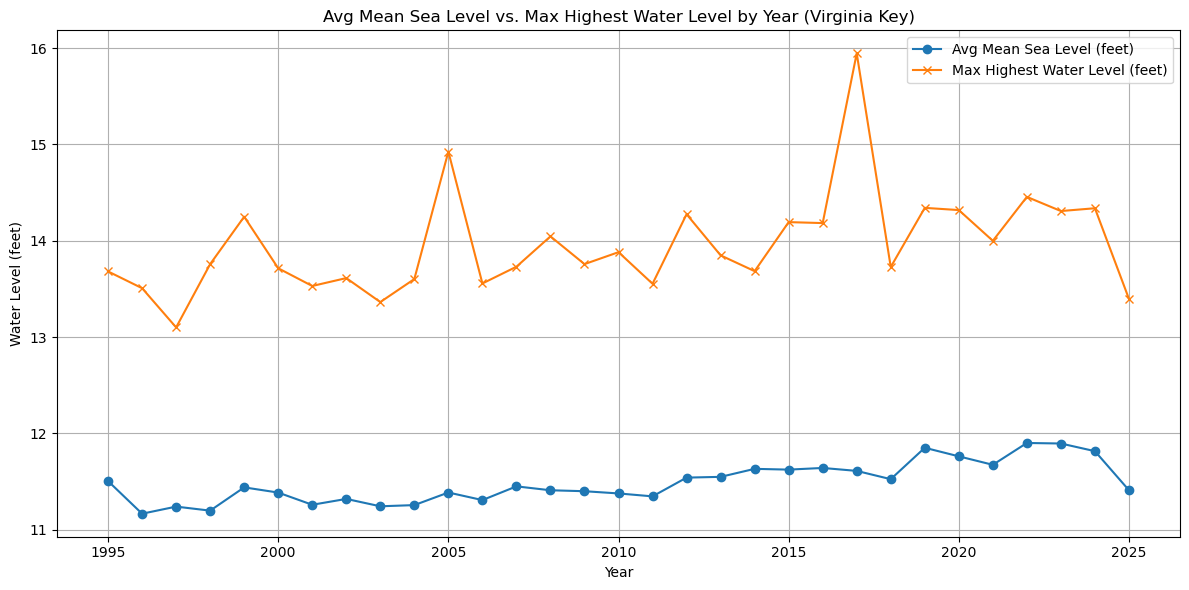

In [9]:
# we graphed both the average mean sea level and the max highest water level to see if we could see any patterns in the last 30 years
plt.figure(figsize=(12, 6))
plt.plot(combined['Year'], combined['Avg Mean Sea Level (feet)'], label='Avg Mean Sea Level (feet)', marker='o')
plt.plot(combined['Year'], combined['Max Highest Water Level (feet)'], label='Max Highest Water Level (feet)', marker='x')

plt.title('Avg Mean Sea Level vs. Max Highest Water Level by Year (Virginia Key)')
plt.xlabel('Year')
plt.ylabel('Water Level (feet)')
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()

### Observations:

Even in the last 30 years, we see a noticeable, steady rise in the average mean sea level, as well as the highest water level, confirming the first piece of our 3-pronged hypothesis <i>(Sea level in the Miami area has risen in the last 30 years)</i>.

We also noticed spikes in the max water level. In 2017, the sea level was normal but the highest water level is extremely high, which stood out to us. We wanted to see if the 2017 bump (and the spikes before it) were because of hurricanes.

To confirm this, we next incorporated hurricane data, creating a list of the hurricanes we wanted to look at in the last 30 years and then creating a dictionary to assign values (year) to the list (hurricanes) we had created. We then superimposed this information into our above graph.

In [10]:
hurricanes = ['Irene', 'Wilma', 'Irma', 'Ian', 'Helene', 'Milton']

In [11]:
hurricane_year_map = {
    'Irene': 1999,
    'Wilma': 2005,
    'Irma': 2017,
    'Ian': 2022,
    'Helene': 2024,
    'Milton': 2024
}

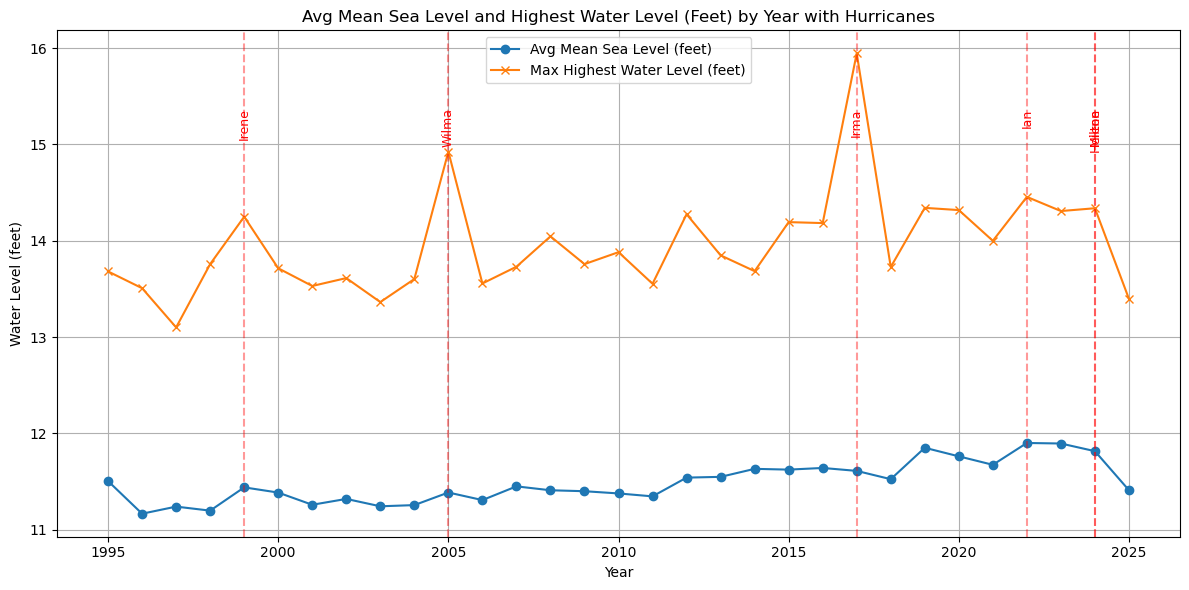

In [12]:
plt.figure(figsize=(12, 6))

# plotting average mean sea level and max highest water level again
plt.plot(combined['Year'], combined['Avg Mean Sea Level (feet)'], label='Avg Mean Sea Level (feet)', marker='o')
plt.plot(combined['Year'], combined['Max Highest Water Level (feet)'], label='Max Highest Water Level (feet)', marker='x')

# adding in hurricane info into the graph
for name in hurricanes:
    year = hurricane_year_map[name]
    if year in combined['Year'].values:
        plt.axvline(x=year, color='red', linestyle='--', alpha=0.4)
        plt.text(year, plt.ylim()[1] * 0.95, name, rotation=90, ha='center', va='top', fontsize=9, color='red')

# styling because aesthetic <33 
plt.title('Avg Mean Sea Level and Highest Water Level (Feet) by Year with Hurricanes')
plt.xlabel('Year')
plt.ylabel('Water Level (feet)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Observations (cont'd.):

Now that we looked into hurricane data, we see that they align perfectly with max sea level rise. Cool info to know :) but since we're just looking at sea level for now (we'll get into hurricanes later), let's only look at mean sea level for now to understand rise. 

First, we calculate the percentage of rise. Then, we try to use various data visualizations to see if that shows us anything new.

Data notes/cleanup and visualization process:
- To calculate increase, we used the years 1996 and 2024 because those were the two full years of data we pulled (1995 and 2025 were partial year data - we pulled from June 1995 to June 2025).

Additional comments added with hashtag (#) below.

In [13]:
# we looked at the increase in average mean sea level from 1996 to 2024
msl_1996 = combined.loc[combined['Year'] == 1996, 'Avg Mean Sea Level (feet)'].values[0]
msl_2024 = combined.loc[combined['Year'] == 2024, 'Avg Mean Sea Level (feet)'].values[0]

increase = msl_2024 - msl_1996

print(f"Increase in average mean sea level from 1996 to 2024: {increase:.3f} feet")

Increase in average mean sea level from 1996 to 2024: 0.649 feet


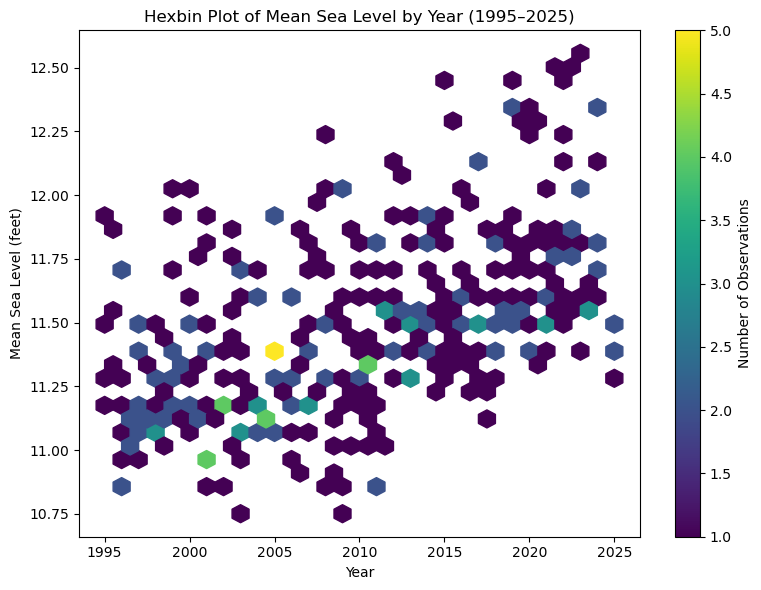

In [14]:
# we made a hexbin plot because we thought they looked pretty and cool :) but this really didn't show us anything new
plt.figure(figsize=(8, 6))
plt.hexbin(df['Year'], df['Mean Sea Level (MSL)'], gridsize=30, cmap='viridis', mincnt=1)
plt.colorbar(label='Number of Observations')
plt.xlabel('Year')
plt.ylabel('Mean Sea Level (feet)')
plt.title('Hexbin Plot of Mean Sea Level by Year (1995–2025)')
plt.tight_layout()
plt.show()

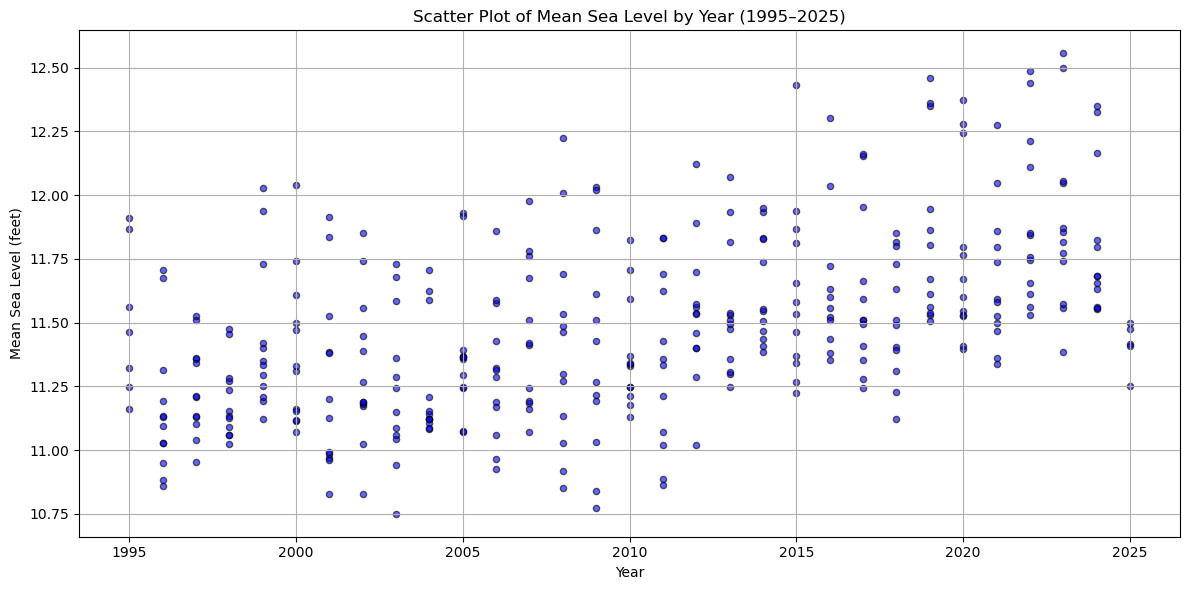

In [15]:
# we then tried to graph the same data using a scatter plot but this didn't show us much either
plt.figure(figsize=(12, 6))
plt.scatter(df['Year'], df['Mean Sea Level (MSL)'], alpha=0.6, s=20, c='blue', edgecolors='k')
plt.xlabel('Year')
plt.ylabel('Mean Sea Level (feet)')
plt.title('Scatter Plot of Mean Sea Level by Year (1995–2025)')
plt.grid(True)
plt.tight_layout()
plt.show()

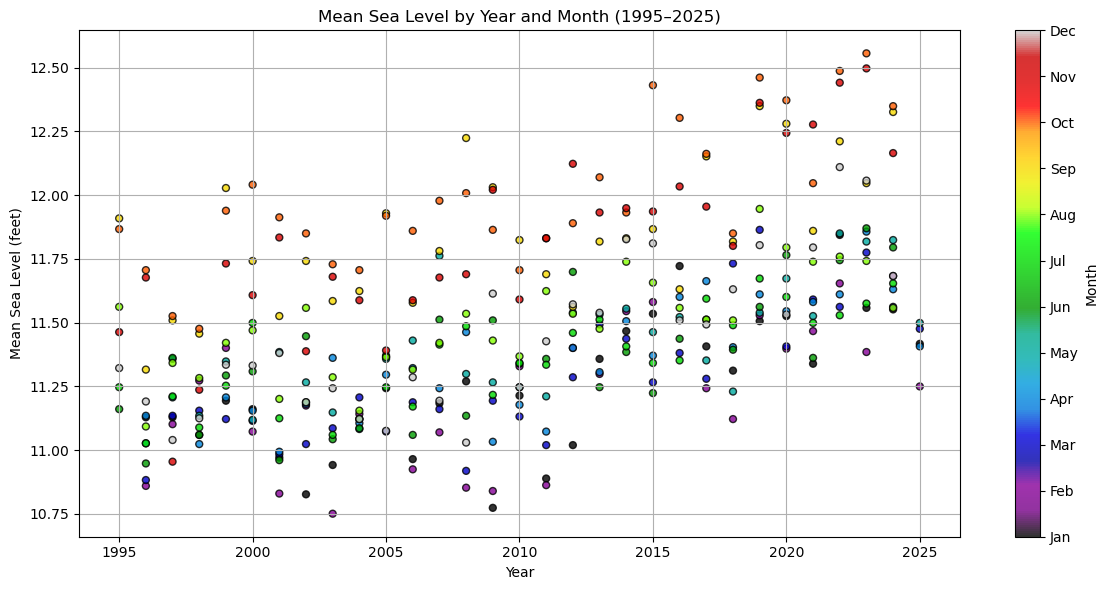

In [16]:
# we then decided to incorporate some analysis of month of the year so we reframed the data to be monthly AND yearly. we also made it rainbow so that the data would be easier to read and because it was pride month when we did this :)
plt.figure(figsize=(12, 6))
scatter = plt.scatter(
    df['Year'],
    df['Mean Sea Level (MSL)'],
    c=df['Month'],              
    cmap='nipy_spectral',      
    alpha=0.8,
    s=25,
    edgecolors='k'
)

cbar = plt.colorbar(scatter, ticks=range(1, 13))
cbar.set_label('Month')
cbar.set_ticks(range(1, 13))
cbar.set_ticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                     'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.xlabel('Year')
plt.ylabel('Mean Sea Level (feet)')
plt.title('Mean Sea Level by Year and Month (1995–2025)')
plt.grid(True)
plt.tight_layout()
plt.show()

### Observations (cont'd.):

This visualization reconfirms the sea level rise of the last 30 years but breaking the trend down by months makes the pattern more drastic and visible. There is a distinct upward jump starting ~2013.

We also saw that December has higher sea levels compared to the rest of the year so we investigated on ChatGPT, which returned the following information:

> King tides occur when:
> 1. The moon is closest to Earth (perigee)
> 2. The sun, moon, and Earth align (new or full moon — called syzygy)
> 3. The Earth is closest to the sun (perihelion — around early January)

King tides happen in December (and sometimes early January) because Earth is closest to the sun (perihelion), so the sun's tidal pull is slightly stronger. Combined with new/full moon and lunar perigee, the gravitational effect is at its strongest. <b>Neat! :)</b>

However, king tides are also the harbinger of what is yet to come with climate change: they reveal future sea level rise impacts, since they're like a “preview” of daily high tides in a warming world. <b>Yikes!</b> Double yikes since in the last couple of years, king tides have crossed 12.5 feet in November-December, which is higher than the annual mean of >12 feet. If we're to follow the trend, this probably means average mean sea level annually will soon cross 12.5 feet. <b>:(</b>

King tides aside, the first part of this analysis confirms our hypothesis that sea level is rising in Miami. Next, let's move to high tide flooding.

# High Tide Flooding

We use the same dataset and impose high tide information onto the graph we already made to see if high tide flooding has increased over the last 30 years. We follow a similar process to sea level and water level in the previous section (and also make the same assumptions).

Additional comments added with hashtag (#) below.

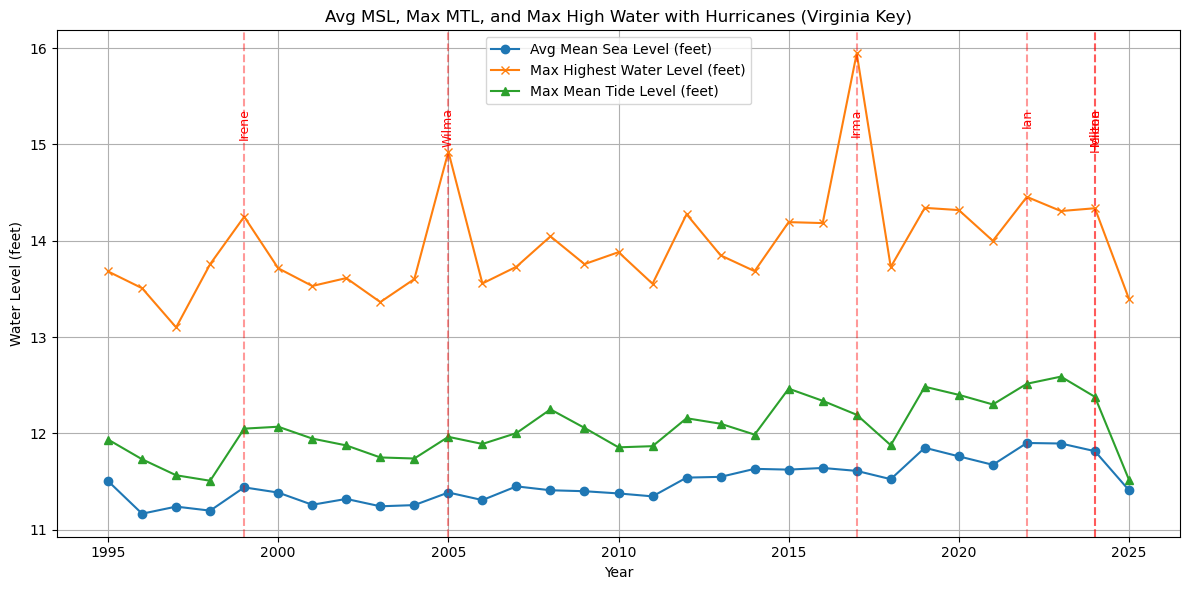

In [17]:
# calculate max mean tide level per year
max_mtl_by_year = df.groupby('Year')['Mean Tide Level (MTL)'].max().reset_index().rename(
    columns={'Mean Tide Level (MTL)': 'Max Mean Tide Level (feet)'}
)

# merge with the existing combined dataframe from above section
combined = pd.merge(combined, max_mtl_by_year, on='Year')

# recreate graph above and add in mean tide level
plt.figure(figsize=(12, 6))
plt.plot(combined['Year'], combined['Avg Mean Sea Level (feet)'], label='Avg Mean Sea Level (feet)', marker='o')
plt.plot(combined['Year'], combined['Max Highest Water Level (feet)'], label='Max Highest Water Level (feet)', marker='x')
plt.plot(combined['Year'], combined['Max Mean Tide Level (feet)'], label='Max Mean Tide Level (feet)', marker='^')
for name in hurricanes:
    year = hurricane_year_map[name]
    if year in combined['Year'].values:
        plt.axvline(x=year, color='red', linestyle='--', alpha=0.4)
        plt.text(year, plt.ylim()[1] * 0.95, name, rotation=90, ha='center', va='top', fontsize=9, color='red')

# styleeeee baby but make it science
plt.title('Avg MSL, Max MTL, and Max High Water with Hurricanes (Virginia Key)')
plt.xlabel('Year')
plt.ylabel('Water Level (feet)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Observations (cont'd.):

Not surprisingly, the trend for high tide flooding is similar to sea level rise, in that there has been a noticeable increase in the last 30 years. This starts confirming the second piece of our hypothesis <i>(The severity of high tide flooding, precipitation, and hurricanes has increased)</i>.

The analysis for high tide flooding is fairly simple and straightforward, especially when done in tandem with sea level and water level rise, since they all follow similar patterns and are different symptoms of the same issue.

Next, let's move onto precipitation analysis.

## Precipitation Analysis

Next, we look at precipitation analysis. We use another dataset from NOAA; this one gauges precipitation at the Miami International Airport (station USW00012839).

Assumptions made:
- Precipitation at the Miami International Airport are indicative of all of Miami.

Data notes/cleanup and visualization process:
- We had a lot of trouble manipulating this dataset and getting any sorts of graphs or charts due to the way "date" is stored. Date was stored as a "int64" and we had to change it to the "date" data type. Our first few attempts to do it didn't work so we had to "coerce" this action.

Additional comments added with hashtag (#) below.

In [18]:
# opening the data and seeing the different types of data stored
df_precip = pd.read_csv(
    "https://www.ncei.noaa.gov/pub/data/ghcn/daily/by_station/USW00012839.csv.gz",
    header=None,
    names=['ID', 'DATE', 'ELEMENT', 'VALUE', 'MFLAG', 'QFLAG', 'SFLAG', 'OBS_TIME'],
    low_memory=False
)
df_precip.head()

,ID,DATE,ELEMENT,VALUE,MFLAG,QFLAG,SFLAG,OBS_TIME
0,USW00012839,19480101,TMAX,272,NaN,NaN,X,NaN
1,USW00012839,19480102,TMAX,272,NaN,NaN,X,NaN
2,USW00012839,19480103,TMAX,222,NaN,NaN,X,NaN
3,USW00012839,19480104,TMAX,222,NaN,NaN,X,NaN
4,USW00012839,19480105,TMAX,189,NaN,NaN,X,NaN


In [19]:
# renaming the columns for ease of use
df_precip.columns = [
    'Station ID',
    'Date',
    'Element Type',
    'Value (tenths of mm)',
    'Measurement Flag',
    'Quality Flag',
    'Source Flag',
    'Observation Time'
]

In [20]:
# seeing what date looks like to see where the issue is
print(df_precip['Date'].head())
print(df_precip['Date'].dtype)

0    19480101
1    19480102
2    19480103
3    19480104
4    19480105
Name: Date, dtype: int64
int64


In [21]:
# the step above showed that the date is in integer format so we coerced it into the proper date format
df_precip['Date'] = pd.to_datetime(df_precip['Date'], errors='coerce')

# summing daily data into annual totals
df_precip['Year'] = df_precip['Date'].dt.year
annual_precip = df_precip.groupby('Year')['Value (tenths of mm)'].sum()

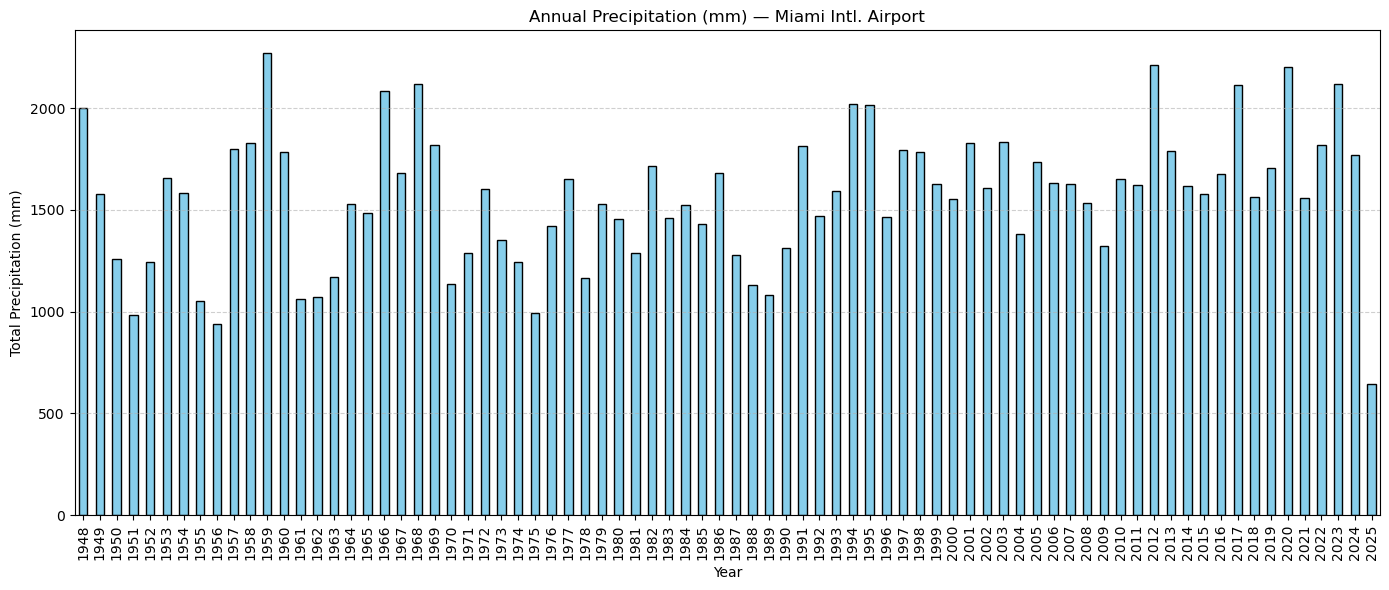

In [22]:
# graphing the annual totals

# re-reading the data. without this piece of code, the graph shows up as a single bar from the 1970s because of how the date data is stored
df_precip = pd.read_csv(
    "https://www.ncei.noaa.gov/pub/data/ghcn/daily/by_station/USW00012839.csv.gz",
    header=None,
    names=[
        'Station ID',
        'Date',
        'Element Type',
        'Value (tenths of mm)',
        'Measurement Flag',
        'Quality Flag',
        'Source Flag',
        'Observation Time'
    ],
    dtype={'Date': str},  # ensures date parses correctly
    low_memory=False       # suppresses dtype warning (any errors)
)

# parse the date column correctly
df_precip['Date'] = pd.to_datetime(df_precip['Date'], format='%Y%m%d', errors='coerce')

# filter for valid precipitation records
df_prcp = df_precip[
    (df_precip['Element Type'] == 'PRCP') &
    (df_precip['Quality Flag'].isna())
].copy()

# extract year and convert precipitation to mm
df_prcp['Year'] = df_prcp['Date'].dt.year
df_prcp['Precip (mm)'] = df_prcp['Value (tenths of mm)'] / 10.0

# group by year and sum
annual_precip = df_prcp.groupby('Year')['Precip (mm)'].sum()

# plot
plt.figure(figsize=(14, 6))
annual_precip.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Annual Precipitation (mm) — Miami Intl. Airport')
plt.xlabel('Year')
plt.ylabel('Total Precipitation (mm)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Observations (cont'd.)

While our project was initially scoped to look at patterns for the last 30 years, we saw no patterns looking at just the last three decades, so we graphed the entire dataset.

From initial observations, the annual precipitation seems to have increased starting ~1992. However, looking at just total annual precipitation isn't enough as it averages out precipitation throughout the year, even on non-rainy days/seasons. Therefore, we also looked at average rainfall only on rainy days.

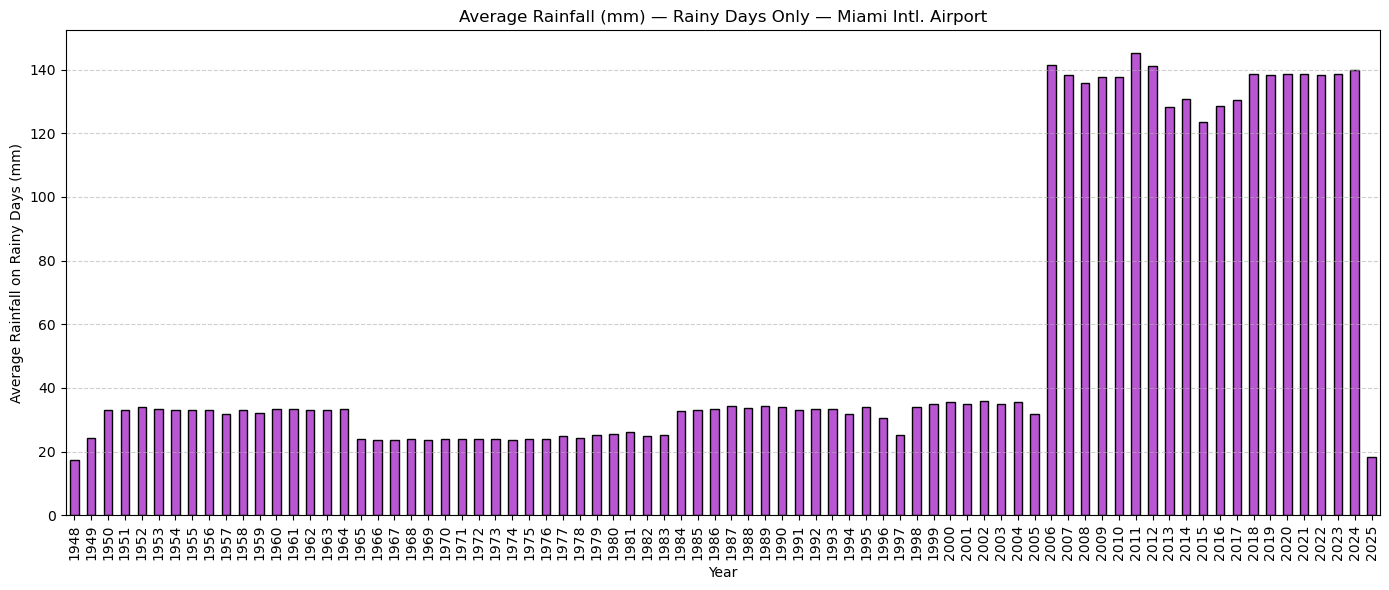

In [23]:
# cleaning the data so the units align
df_precip['Precip (mm)'] = df_precip['Value (tenths of mm)'] / 10.0
df_precip = df_precip[df_precip['Precip (mm)'] > 0]

# calculating average daily rainfall on only rainy days
df_precip['Year'] = df_precip['Date'].dt.year
annual_avg_rainy = df_precip.groupby('Year')['Precip (mm)'].mean()

# plot the result
plt.figure(figsize=(14, 6))
annual_avg_rainy.plot(kind='bar', color='mediumorchid', edgecolor='black')
plt.title('Average Rainfall (mm) — Rainy Days Only — Miami Intl. Airport')
plt.xlabel('Year')
plt.ylabel('Average Rainfall on Rainy Days (mm)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Observations (cont'd.)

The graph above indicates that when we filter to just rainy days, the average rainfall increases significantly, starting in 2006. The pattern is a little too clean and abrupt but we spent so much time on this without getting different results so we ultimately had to move on. We wanted to see if there was any correlation between hurricanes and rainfall - we could not find any with this dataset.

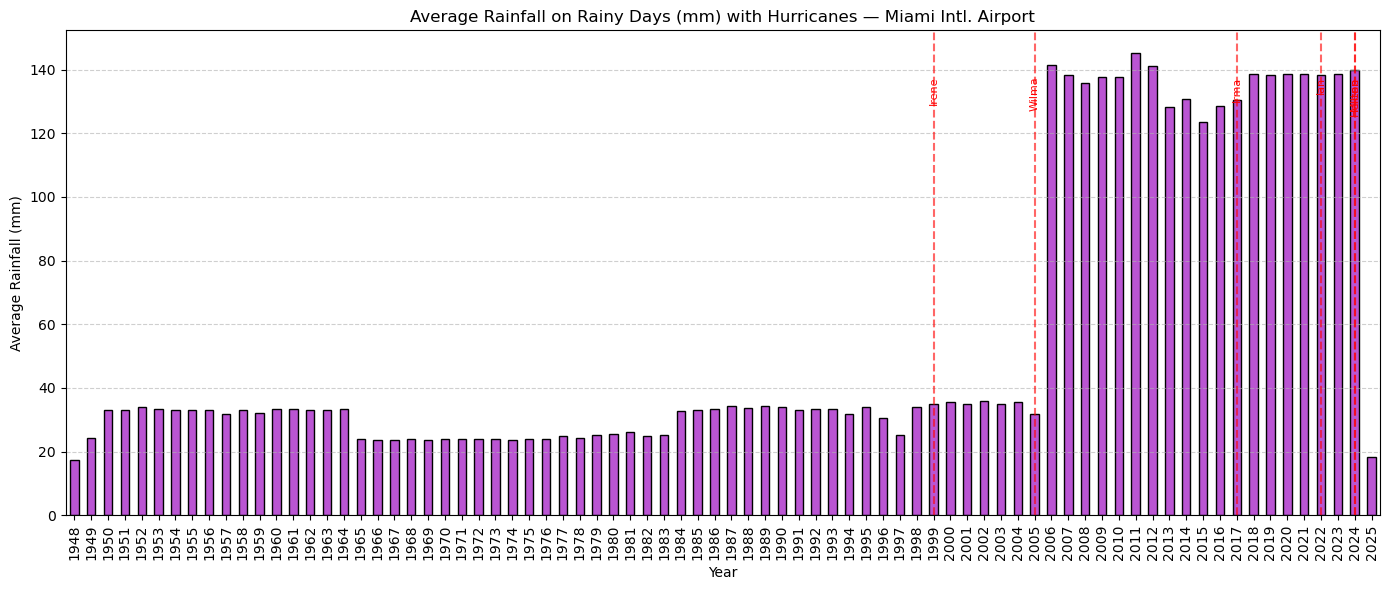

In [24]:
# code for the bar chart
plt.figure(figsize=(14, 6))
ax = annual_avg_rainy.plot(kind='bar', color='mediumorchid', edgecolor='black')

# adding hurricane annotations
for name, year in hurricane_year_map.items():
    if year in annual_avg_rainy.index:
        xpos = annual_avg_rainy.index.get_loc(year)
        ax.axvline(x=xpos, color='red', linestyle='--', alpha=0.6)
        ax.text(xpos, 
                annual_avg_rainy.max() * 0.95, 
                name, 
                rotation=90, 
                ha='center', 
                va='top', 
                fontsize=8, 
                color='red')

# style
plt.title('Average Rainfall on Rainy Days (mm) with Hurricanes — Miami Intl. Airport')
plt.xlabel('Year')
plt.ylabel('Average Rainfall (mm)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Observations (cont'd.)

This section showed that precipitation "flooding" was increasing, both by annual total precipitation and average rainfall per rainy day, confirming another piece of our second hypothesis <i>(The severity of high tide flooding, precipitation, and hurricanes has increased)</i>.

Next, we go to hurricane analysis, the final piece of our hypothesis.

# Hurricane Analysis

Our hurricane analysis is broken down into two portions: looking at both the severity and frequency of hurricanes. For this section, we pulled IBTrACS data on all recorded hurricanes.

Assumptions made:
- We assumed that hurricanes hitting the Gulf of Mexico or Caribbean Sea subbasins would affect Miami.

Data notes/cleanup and visualization process:
- Because this data contained data from all recorded hurricanes, we had to filter down to hurricanes from just the North Atlantic Basin.
- The dataset had many undefined, not named, and NaN values. After trying multiple filters, what helped pull the cleanest data was filtering by subbasins GM (Gulf of Mexico) and CS (Caribbean Sea).
- Each hurricane has an SID (Storm Identifier), which is what we're using to anchor our analysis.

Additional comments added with hashtag (#) below.

In [25]:
# reading the dataset and taking a look at the head
df_ibtracs = pd.read_csv(
    "https://www.ncei.noaa.gov/data/international-best-track-archive-for-climate-stewardship-ibtracs/v04r00/access/csv/ibtracs.ALL.list.v04r00.csv",
    skiprows=[1],
    low_memory=False
)
df_ibtracs.head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,...,BOM_GUST_PER,REUNION_GUST,REUNION_GUST_PER,USA_SEAHGT,USA_SEARAD_NE,USA_SEARAD_SE,USA_SEARAD_SW,USA_SEARAD_NW,STORM_SPEED,STORM_DIR
0,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 03:00:00,NR,10.9000,80.3000,...,,,,,,,,,9,266
1,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 06:00:00,NR,10.8709,79.8265,...,,,,,,,,,9,267
2,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 09:00:00,NR,10.8431,79.3524,...,,,,,,,,,9,267
3,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 12:00:00,NR,10.8188,78.8772,...,,,,,,,,,9,267
4,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 15:00:00,NR,10.8000,78.4000,...,,,,,,,,,9,268


In [26]:
# filtering the data to only GM or CS, which would be the hurricanes we're assuming would affect Miami
df_ibtracs_filtered = df_ibtracs[df_ibtracs['SUBBASIN'].isin(['GM', 'CS'])]
unique_storms = df_ibtracs_filtered['SID'].nunique()

# we wanted to see the number since we did this a few times and some filtering options would result in 0 results
print(f"Number of unique storms in GM or CS sub-basin: {unique_storms}")

Number of unique storms in GM or CS sub-basin: 1114


In [27]:
# seeing the filtered dataset
df_ibtracs_filtered

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,...,BOM_GUST_PER,REUNION_GUST,REUNION_GUST_PER,USA_SEAHGT,USA_SEARAD_NE,USA_SEARAD_SE,USA_SEARAD_SW,USA_SEARAD_NW,STORM_SPEED,STORM_DIR
562,1851175N26270,1851,5,NaN,GM,NOT_NAMED,1851-06-23 12:00:00,TS,26.1000,-90.4000,...,,,,,,,,,6,291
563,1851175N26270,1851,5,NaN,GM,NOT_NAMED,1851-06-23 15:00:00,TS,26.2001,-90.6999,...,,,,,,,,,6,290
564,1851175N26270,1851,5,NaN,GM,NOT_NAMED,1851-06-23 18:00:00,TS,26.3000,-91.0000,...,,,,,,,,,6,290
565,1851175N26270,1851,5,NaN,GM,NOT_NAMED,1851-06-23 21:00:00,TS,26.3999,-91.3001,...,,,,,,,,,6,290
566,1851175N26270,1851,5,NaN,GM,NOT_NAMED,1851-06-24 00:00:00,TS,26.5000,-91.6000,...,,,,,,,,,6,290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715088,2023321N15278,2023,79,NaN,CS,NOT_NAMED,2023-11-17 12:00:00,NR,17.0364,-79.8000,...,,,,,,,,,15,49
715089,2023321N15278,2023,79,NaN,CS,NOT_NAMED,2023-11-17 15:00:00,NR,17.5021,-79.1718,...,,,,,,,,,16,52
715090,2023321N15278,2023,79,NaN,CS,NOT_NAMED,2023-11-17 18:00:00,NR,18.0000,-78.5000,...,,,,12,,120,,,17,49
715091,2023321N15278,2023,79,NaN,CS,NOT_NAMED,2023-11-17 21:00:00,NR,18.5966,-77.8436,...,,,,,,,,,18,45


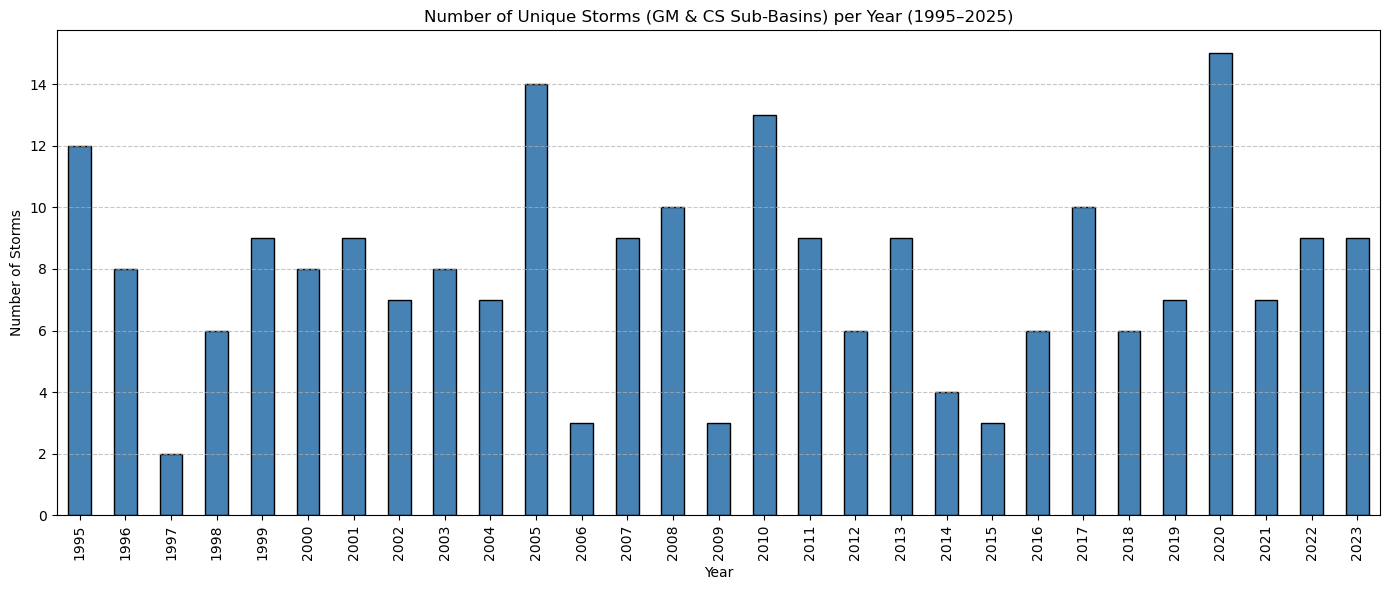

In [28]:
# graphing the number of hurricanes per year to see if frequency increased

# filter for years 1995–2025
df_filtered_years = df_ibtracs_filtered[
    (df_ibtracs_filtered['SEASON'] >= 1995) & (df_ibtracs_filtered['SEASON'] <= 2025)
]

# groupby to count all seasons into a year and then count unique SIDs (hurricanes) per year
storm_counts = df_filtered_years.groupby('SEASON')['SID'].nunique()

# plot
plt.figure(figsize=(14, 6))
storm_counts.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Number of Unique Storms (GM & CS Sub-Basins) per Year (1995–2025)')
plt.xlabel('Year')
plt.ylabel('Number of Storms')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Observations (con'td.)

The absence of hurricanes in 2024 and 2025 in the IBTrACS dataset is likely because the archive is not a real-time source—it is a post-season, validated dataset that often lags behind the current year. As a result, data for 2024 may still be incomplete or undergoing review, and 2025 data likely hasn’t been added yet. Additionally, even if storms occurred, they may not yet have been assigned storm IDs or sub-basin classifications like GM or CS, which would exclude them from our filtered results.

On top of the absense of hurricanes in 2024 and 2025, we're not seeing any clear pattern in just the last 30 years so let's zoom out and plot all recorded hurricane history.

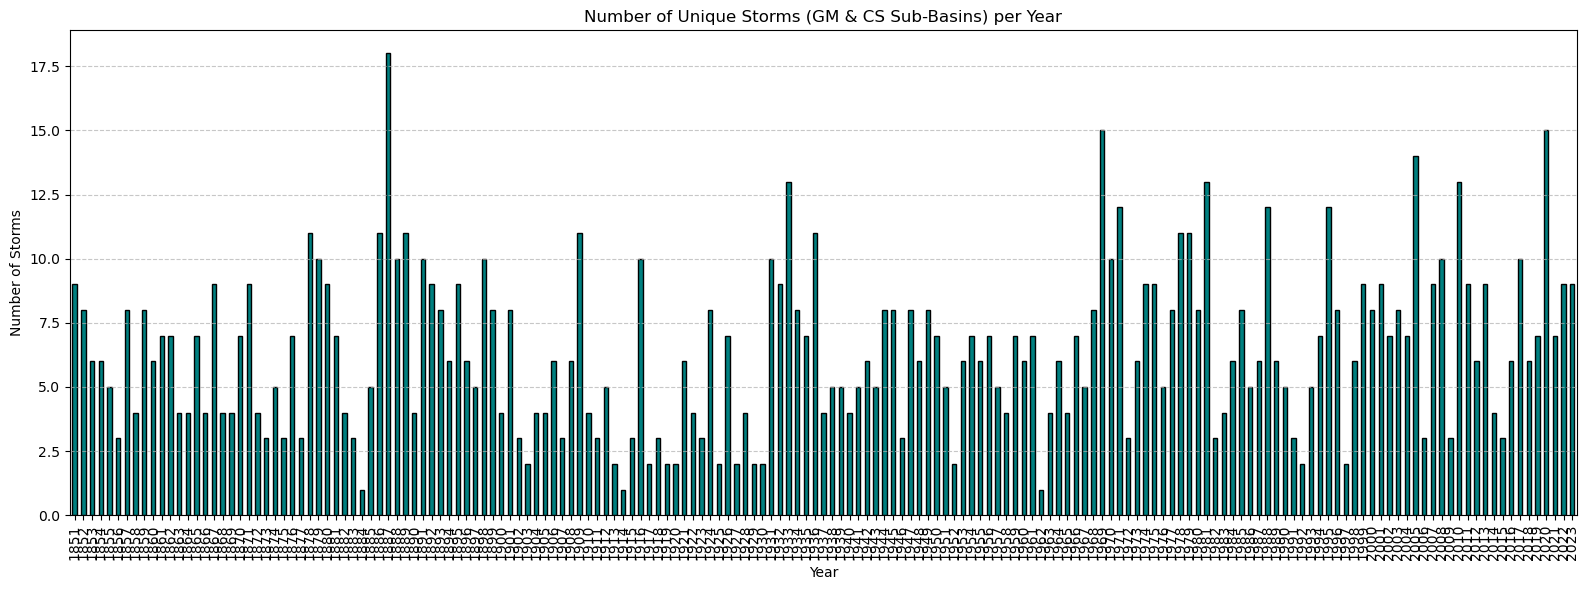

In [29]:
# count unique hurricanes per year (by SID)
storm_counts_all_years = df_ibtracs_filtered.groupby('SEASON')['SID'].nunique()

# plot
plt.figure(figsize=(16, 6))
storm_counts_all_years.plot(kind='bar', color='teal', edgecolor='black')
plt.title('Number of Unique Storms (GM & CS Sub-Basins) per Year')
plt.xlabel('Year')
plt.ylabel('Number of Storms')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Observations (cont'd.)

We're not able to see a clear pattern with all hurricanes in recorded history. So we filtered out some noise and repeated the steps above but only with Category 3+ hurricanes to focus only on stronger hurricanes.

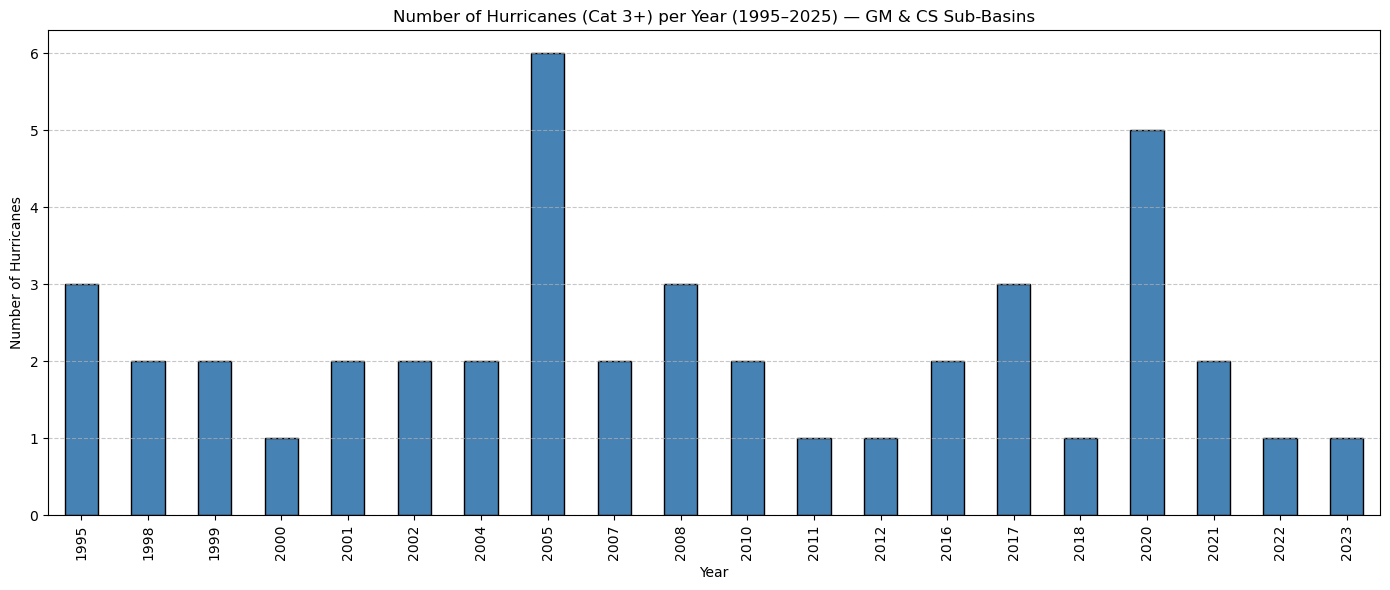

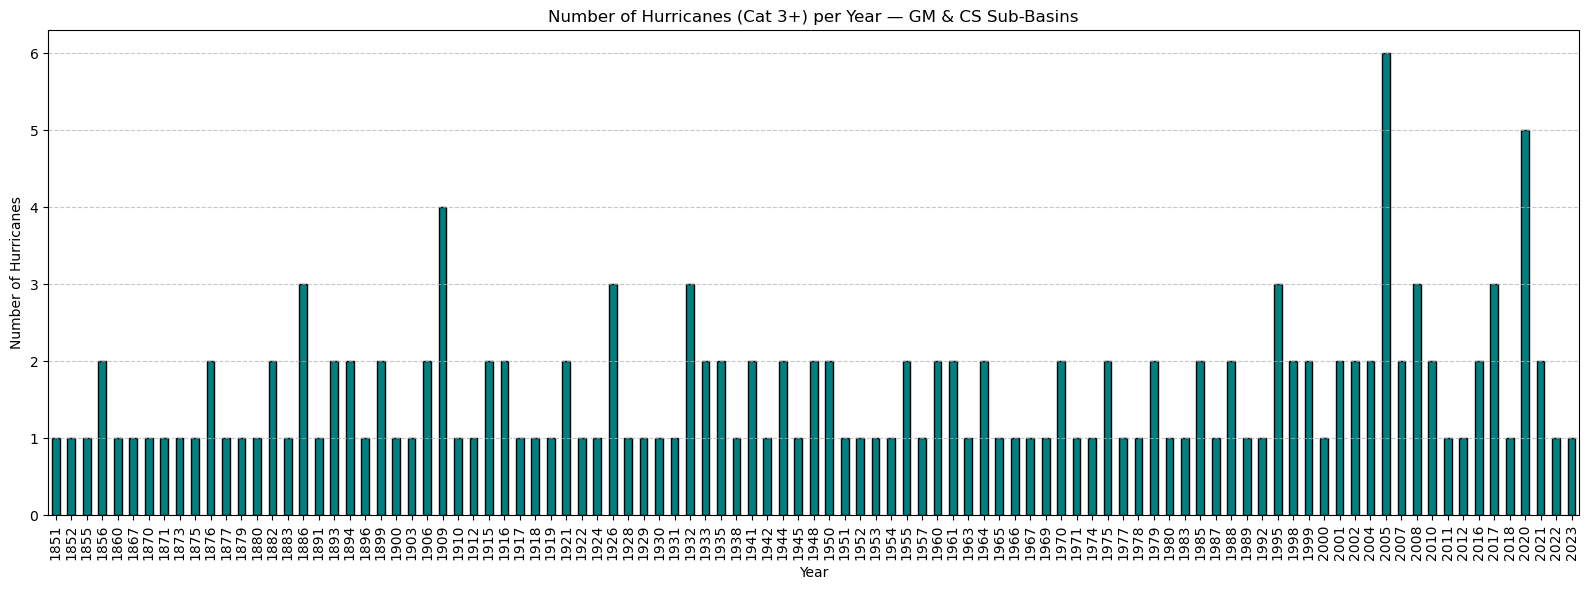

In [30]:
# filter to only hurricanes Category 3 and above and repeat the above process
df_hurricanes_only = df_ibtracs_filtered[df_ibtracs_filtered['USA_SSHS'] >= 3]

df_1995_2025 = df_hurricanes_only[
    (df_hurricanes_only['SEASON'] >= 1995) & (df_hurricanes_only['SEASON'] <= 2025)
]

storms_per_year_recent = df_1995_2025.groupby('SEASON')['SID'].nunique()

plt.figure(figsize=(14, 6))
storms_per_year_recent.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Number of Hurricanes (Cat 3+) per Year (1995–2025) — GM & CS Sub-Basins')
plt.xlabel('Year')
plt.ylabel('Number of Hurricanes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

storms_per_year_all = df_hurricanes_only.groupby('SEASON')['SID'].nunique()

plt.figure(figsize=(16, 6))
storms_per_year_all.plot(kind='bar', color='teal', edgecolor='black')
plt.title('Number of Hurricanes (Cat 3+) per Year — GM & CS Sub-Basins')
plt.xlabel('Year')
plt.ylabel('Number of Hurricanes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Observations (cont'd.)

While we couldn't notice a pattern for all hurricanes, when we clear out the noise, we can see an increase in Category 3+ hurricanes for the last 30 years, showing that the intensity of hurricanes has increased. We then graphed all hurricanes by category again to confirm this theory, using the same process as above, but this time breaking down the graph by category of hurricanes. We then repeated this to filter only to hurricanes Category 3+.

As an aside: we tried to remove the -5-0 Categories in the graph key. However, these seem to be ghost categories: every time we tried to filter them out or remove them from the key, the graph didn't work.

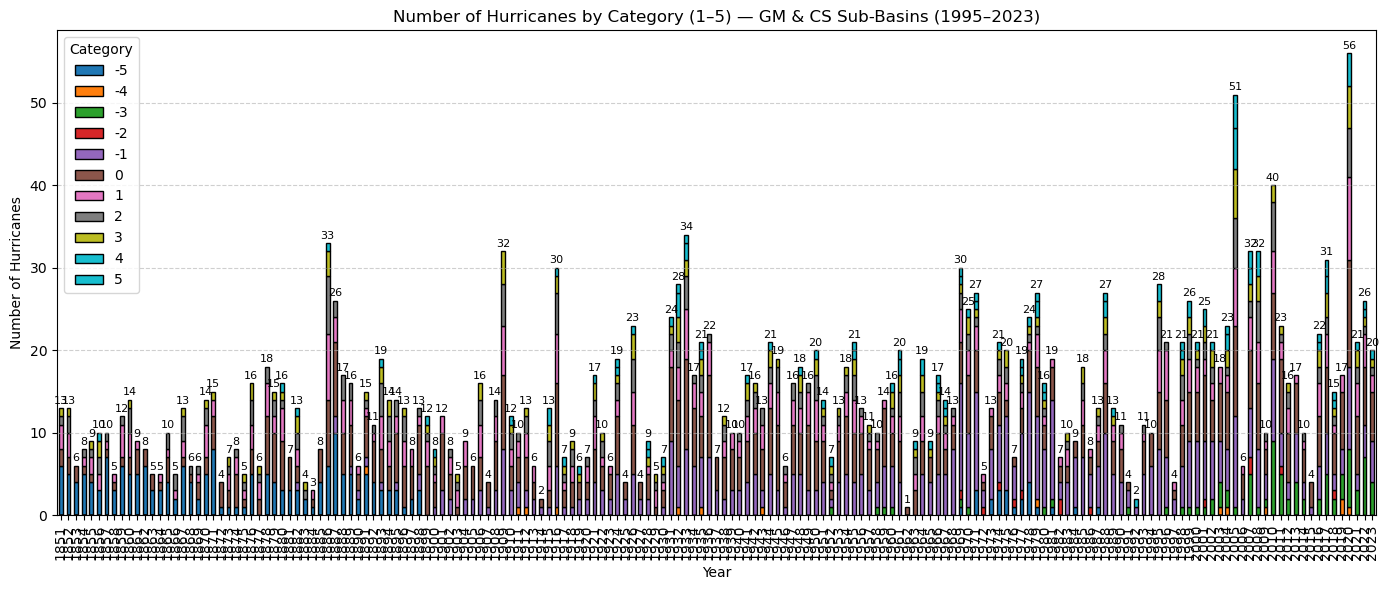

In [31]:
# group by year and category
recent_grouped = df_ibtracs_filtered.groupby(['SEASON', 'USA_SSHS'])['SID'].nunique().unstack(fill_value=0)

# calculate total per year
totals = recent_grouped.sum(axis=1)

# plot stacked bar chart
ax = recent_grouped.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 6),
    colormap='tab10',
    edgecolor='black'
)

# add totals as labels above bars to make the graph easier to read
for i, total in enumerate(totals):
    ax.text(i, total + 0.3, str(total), ha='center', va='bottom', fontsize=8)

# style
plt.title('Number of Hurricanes by Category (1–5) — GM & CS Sub-Basins (1995–2023)')
plt.xlabel('Year')
plt.ylabel('Number of Hurricanes')
plt.legend(title='Category', loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

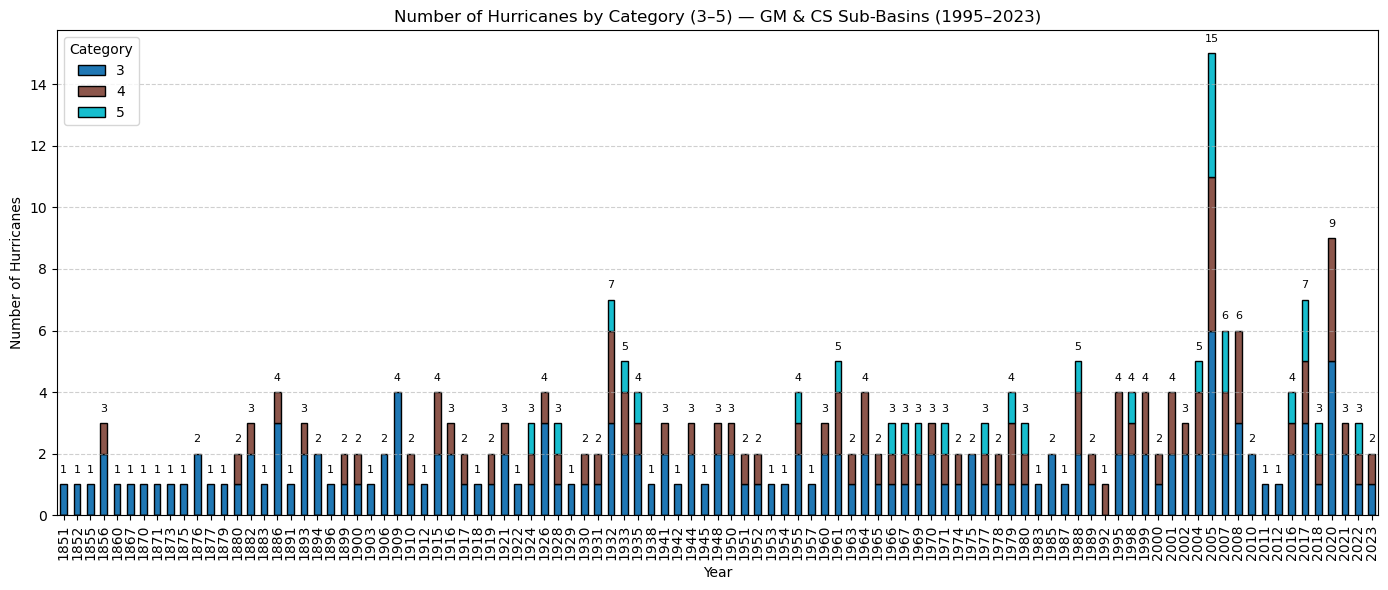

In [32]:
# repeat the above steps but to the dataframe that has been filtered to only hurricanes Category 3+
recent_grouped = df_hurricanes_only.groupby(['SEASON', 'USA_SSHS'])['SID'].nunique().unstack(fill_value=0)

totals = recent_grouped.sum(axis=1)

ax = recent_grouped.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 6),
    colormap='tab10',
    edgecolor='black'
)

for i, total in enumerate(totals):
    ax.text(i, total + 0.3, str(total), ha='center', va='bottom', fontsize=8)

plt.title('Number of Hurricanes by Category (3–5) — GM & CS Sub-Basins (1995–2023)')
plt.xlabel('Year')
plt.ylabel('Number of Hurricanes')
plt.legend(title='Category', loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Observations (cont'd.)

With the above graph, we see a definite increase in the intensity of the hurricanes: in the late 1800s, there were most Category 3 hurricanes, whereas now, we have most Category 4 and 5 hurricanes. :(

We wanted to bring this analysis back to our original scope of looking at the last 30 years, so we repeated the above processes but only to years 1995-2025 (technically 2023 since IBtRACS doesn't have 2024 and 2025 data yet).

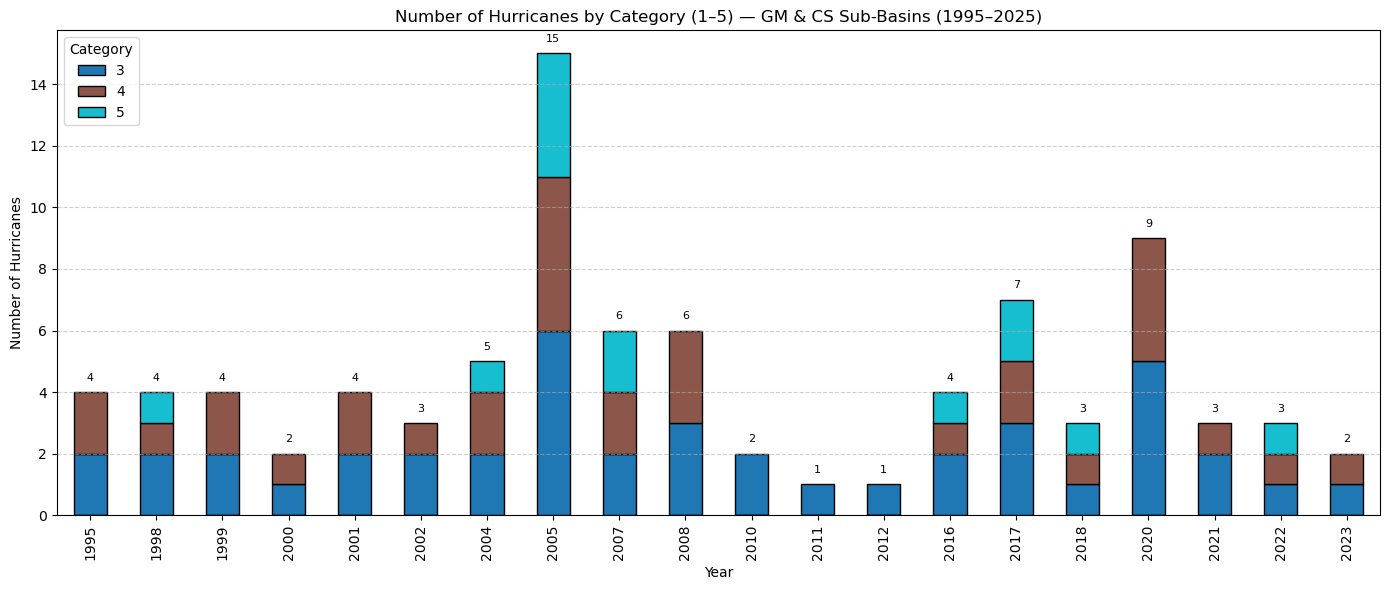

In [33]:
# filter to hurricanes from 1995 to 2025
df_1995_2025 = df_hurricanes_only[
    (df_hurricanes_only['SEASON'] >= 1995) &
    (df_hurricanes_only['SEASON'] <= 2025)
]

# repeat same graphing process as above
recent_grouped = df_1995_2025.groupby(['SEASON', 'USA_SSHS'])['SID'].nunique().unstack(fill_value=0)

totals = recent_grouped.sum(axis=1)

ax = recent_grouped.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 6),
    colormap='tab10',
    edgecolor='black'
)

for i, total in enumerate(totals):
    ax.text(i, total + 0.3, str(total), ha='center', va='bottom', fontsize=8)

plt.title('Number of Hurricanes by Category (1–5) — GM & CS Sub-Basins (1995–2025)')
plt.xlabel('Year')
plt.ylabel('Number of Hurricanes')
plt.legend(title='Category', loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Observations (con't.d)

While we see a clear pattern when we look at the data from 1850, we don't see as clear of a pattern for just the last 30 years.

Regardless, the second portion of our hypothesis <i>(The severity of high tide flooding, precipitation, and hurricanes has increased)</i> is now fully confirmed, while the third portion of our hypothesis <i>(The frequency of hurricanes has increased)</i> is inconclusive from just our analysis above, as there was no discernible pattern we saw with overall frequency. This is not to say there is no increase in frequency, only that the simple analysis we have done did not show anything clear.

## Hypothesis Verification

Our original hypothesis was as follows:
> - Sea level in the Miami area has risen in the last 30 years
> - The severity of high tide flooding, precipitation, and hurricanes has increased
> - The frequency of hurricanes has increased

Our above analysis indicates:
- Increasing sea level in the last 30 years
- Increasing severity of high tide flooding, precipitation, and hurricanes
- Inconclusive results on overall frequency of hurricanes

Next, we superimpose our flood analysis with maps of Miami to understand risk by neighborhood.

## Risk Maps

Now that we have more or less understood high level flooding patterns in Miami, we wanted to map out which areas are most at risk. First, we pulled in elevation data from NOAA and set a parameter than any less than or equal to 1 meter will be at risk from a certain form of flooding. Then, we superimposed a nicer-looking map of Miami to finish our risk mapping.

Assumptions made:
- Any area in Miami with an elevation of 1 meter or less is at risk of some sort of flooding.
- We assumed Miami's approximate latitude was from 25.5 to 25.9 and longitude was from -80.4 to -80.1.

Data notes/cleanup and visualization process:
- The datasets we worked with were <b>huge</b>! So to do the analysis we wanted to do, we had to run our code for quite some time.
- We first tried to work with rasters when we imported elevation data. However, that simply didn't work so we shifted to Xarray.

While we wanted to import neighborhood names to assign some sort of risk level by neighborhood, the datasets we were working with were so large and unwieldy that we were unable to within the scope of this final project. However, we will elaborate on this through the next class (Machine Learning for Climate Science and Environmental Sustainability).

Additional comments added with hashtag (#) below.

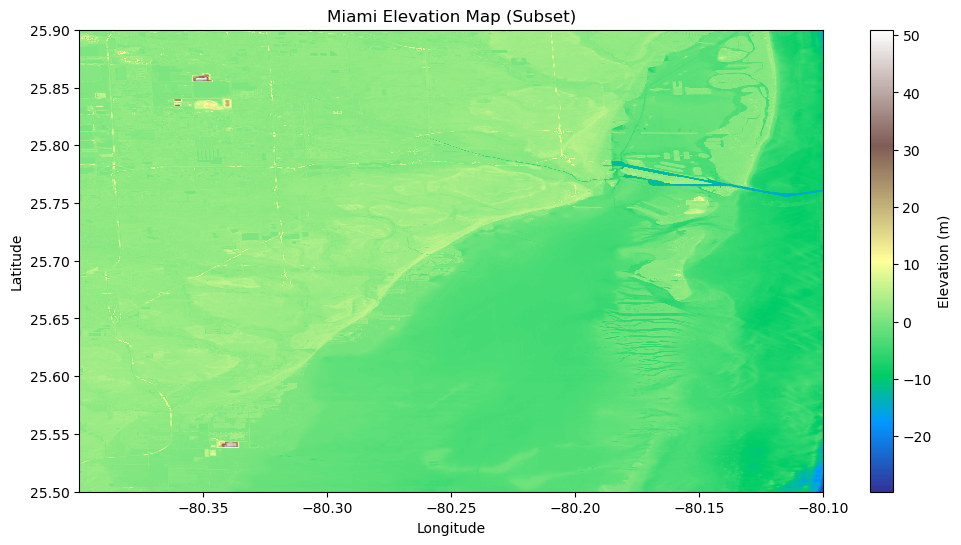

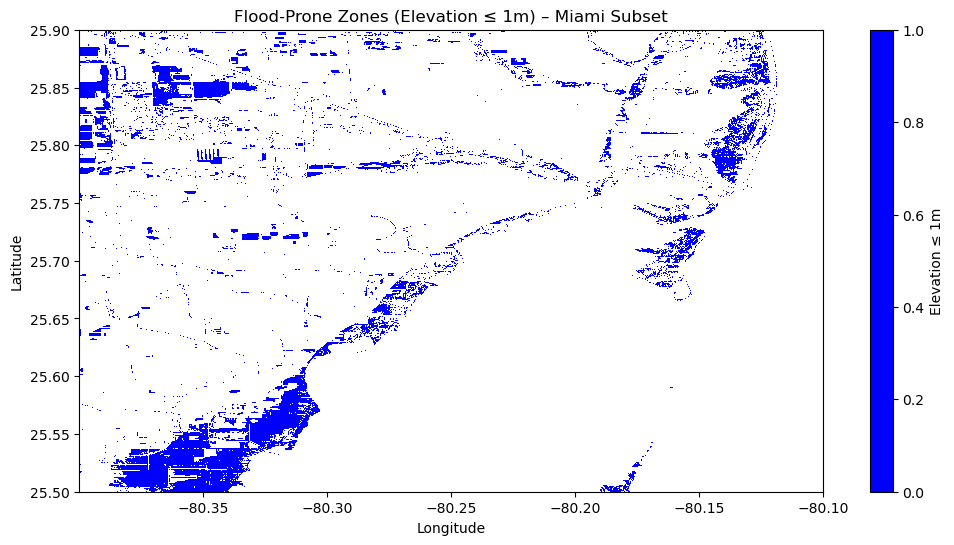

In [36]:
# importing xarray and colors portion of matplotlib to map out risk in Miami
import xarray as xr
from matplotlib.colors import ListedColormap

# open NetCDF via OpenDAP (don't load all data because it was too heavy)
ds = xr.open_dataset("https://www.ngdc.noaa.gov/thredds/dodsC/regional/miami_13_navd88_2015.nc")

# subset the dataset to the Miami region (adjust bounds as needed) - assumptions made on Miami latitude and longitude
lat_range = slice(25.5, 25.9)   
lon_range = slice(-80.4, -80.1)  

subset = ds.sel(lat=lat_range, lon=lon_range)

# load only the subset into memory
elevation = subset['Band1'].values
lat = subset['lat'].values
lon = subset['lon'].values

# create an elevation mask where elevation ≤ 1m
low_elevation_mask = (elevation >= 0) & (elevation <= 1)
low_elevation = np.where(low_elevation_mask, elevation, np.nan)

# plot full elevation
plt.figure(figsize=(12, 6))
plt.title("Miami Elevation Map (Subset)")
plt.pcolormesh(lon, lat, elevation, cmap='terrain', shading='auto')
plt.colorbar(label="Elevation (m)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# plot flood-prone zones
plt.figure(figsize=(12, 6))
plt.title("Flood-Prone Zones (Elevation ≤ 1m) – Miami Subset")
plt.pcolormesh(lon, lat, low_elevation, cmap=ListedColormap(['blue']), shading='auto')
plt.colorbar(label="Elevation ≤ 1m")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

### Observations (cont'd.)

From the elevation map, we can see that most of Miami is between 0 and 10 meters so we are totally screwed. :( In the second map, we've isolated just the portions with elevation of 1 meter or lower, which shows the areas that are most at risk. This map shows how a significant portion of Miami is at risk per our parameters.

While the latitude and longitude map is helpful, we wanted to superimpose this risk mapping on a more viewer-friendly map of Miami, which we do below.

/tmp/ipykernel_1912/1315785521.py:70: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/srv/conda/envs/notebook/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


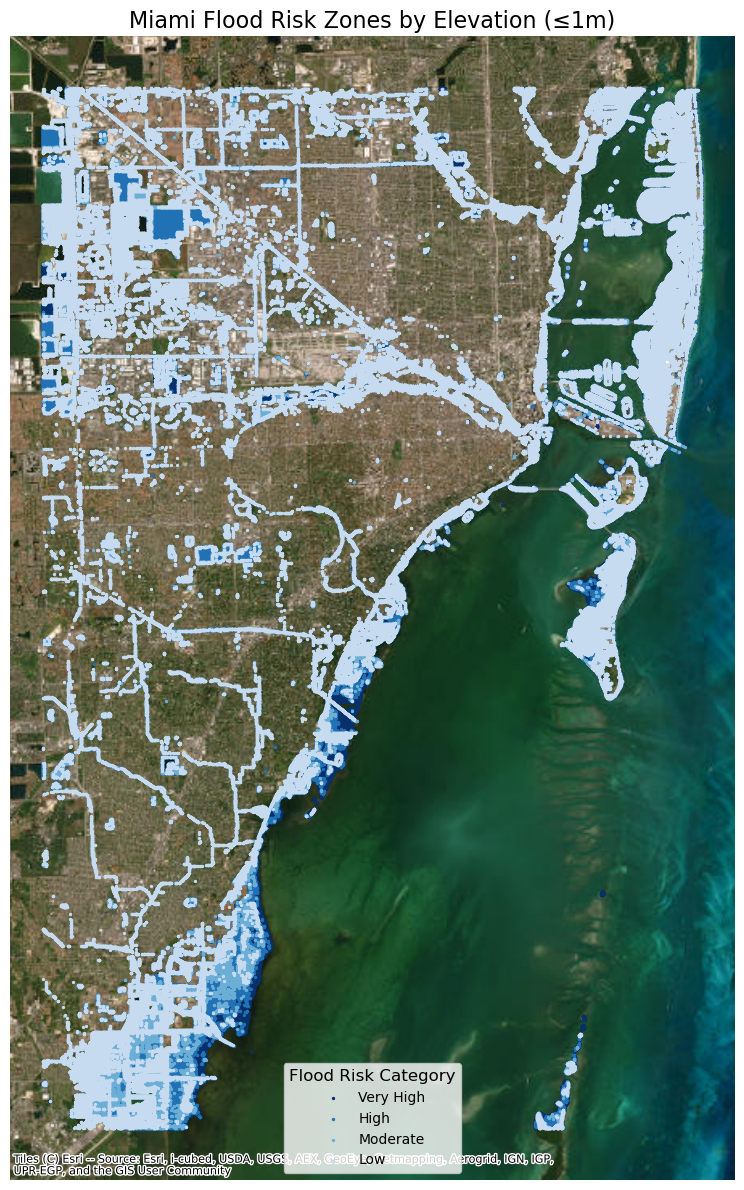

In [39]:
# import more packages as needed to impose new map
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx

# repeat same steps as above
ds = xr.open_dataset("https://www.ngdc.noaa.gov/thredds/dodsC/regional/miami_13_navd88_2015.nc")

lat_range = slice(25.5, 25.9)
lon_range = slice(-80.4, -80.1)
subset = ds.sel(lat=lat_range, lon=lon_range)

elevation = subset['Band1'].values
lat = subset['lat'].values
lon = subset['lon'].values

# create grid and flatten
lon_grid, lat_grid = np.meshgrid(lon, lat)
flat_lon = lon_grid.flatten()
flat_lat = lat_grid.flatten()
flat_elev = elevation.flatten()

# filter to our parameters of elevation is 1 meter or less
mask = (flat_elev >= 0) & (flat_elev <= 1.0)
df = pd.DataFrame({
    'lon': flat_lon[mask],
    'lat': flat_lat[mask],
    'elevation': flat_elev[mask]
})

# assign flood risk category for some granularity
def classify_risk(elev):
    if elev <= 0.25:
        return "Very High"
    elif elev <= 0.5:
        return "High"
    elif elev <= 0.75:
        return "Moderate"
    else:
        return "Low"

df['risk'] = df['elevation'].apply(classify_risk)

# convert to GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['lon'], df['lat']), crs="EPSG:4326")
gdf = gdf.to_crs(epsg=3857)

# style! plot flood zones with risk colors
colors = {
    "Very High": "#08306B",
    "High": "#2171B5",
    "Moderate": "#6BAED6",
    "Low": "#C6DBEF"
}

fig, ax = plt.subplots(figsize=(16, 12))
for risk_level, color in colors.items():
    gdf[gdf['risk'] == risk_level].plot(
        ax=ax,
        markersize=2,
        color=color,
        label=risk_level
    )

ctx.add_basemap(ax, source=ctx.providers.Esri.WorldImagery)
ax.set_title("Miami Flood Risk Zones by Elevation (≤1m)", fontsize=16)
ax.legend(title="Flood Risk Category", fontsize=10, title_fontsize=12)
ax.axis('off')
plt.tight_layout()
plt.show()

### Observations (cont'd.)

We see risk in a similar shape as above; however, this new GeoDataFrame we imported (which showcases a satellite map of Miami) makes it easier to see where risk lies (instead of latitude and longitude, which can be abstract).

## Next steps

Here's how we plan to expand this analysis further in the Machine Learning for Climate Science and Environmental Sustainability class:
- Incorporate SVI data (which communities/neighborhoods are most at risk)
- Potentially create a dashboard (neighborhoods at risk of which flooding) - residents can look up this analysis
- Perform a CMIP analysis to compare our findings with established models
- Predict/forecast where Miami will be more affected by which type of flooding in the future
- Create a map of above risk